# Práctica 19: 

Elaboró: Carlos Alejandro Jarero Gonzalez <al255813@alumnos.uacj.mx>

Matrícula: 255813

El presente Notebook fue relizado en equipo local con Kernel Python 3.11.8 en VS Code.

## Objetivos

El objetivo de esta actividad que el alumno haga un Exploratory Descriptive Analysis (EDA) y practicar .

## Instrucciones de uso

Este notebook puede extraer datos descargados directemente de un url.

Si quieres cambiar la fuente de datos solo ve a la sección de parameters y cambia el ```url```.

Puedes cambiar la random_state en ```random_state```.

## Descripción del conjunto de datos

Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.

Puedes emplear este codigo para cargar tu codigo

```python
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)
```
## Instrucciones para los estudiantes:

1. Descargar el archivo AirQuality.csv desde el enlace proporcionado.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
import scipy.stats as stats 
from IPython.display import display, Markdown

pd.set_option("display.max_rows", 250)

BINS = 10

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

random_state = 42

column_names = ["age", "year", "nodes", "status"]
df = pd.read_csv(url, header=None, names=column_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [2]:
df.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
# Ajustamos los tipos de datos y nombres para falicitar el manejo.

df["status"] = df["status"].astype("category")
df["status"] = df["status"].map({1:"survived 5 years or longer", 2: "died within 5 year"})

df.head(10)

,age,year,nodes,status
0,30,64,1,survived 5 years or longer
1,30,62,3,survived 5 years or longer
2,30,65,0,survived 5 years or longer
3,31,59,2,survived 5 years or longer
4,31,65,4,survived 5 years or longer
5,33,58,10,survived 5 years or longer
6,33,60,0,survived 5 years or longer
7,34,59,0,died within 5 year
8,34,66,9,died within 5 year
9,34,58,30,survived 5 years or longer


In [4]:
# Buscamos duplicados
print(df.duplicated().sum())

df[df.duplicated()]

17


,age,year,nodes,status
23,37,63,0,survived 5 years or longer
27,38,60,0,survived 5 years or longer
52,41,65,0,survived 5 years or longer
65,43,64,0,died within 5 year
78,44,61,0,survived 5 years or longer
108,48,58,11,died within 5 year
132,50,61,0,survived 5 years or longer
179,54,62,0,survived 5 years or longer
184,55,58,1,survived 5 years or longer
196,56,60,0,survived 5 years or longer


Encontramos duplicados, para fines del ejercicio los dejamoos y seguiremos con estos.

In [5]:
# Revisamos lo que queda para ser utilizado.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


2. Realizar un EDA completo, incluyendo:

- Descripción de los datos.

In [6]:
numeric_columns = df.select_dtypes(include=["int64"]).columns

df[numeric_columns].describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


- Histogramas para las columnas numéricas.

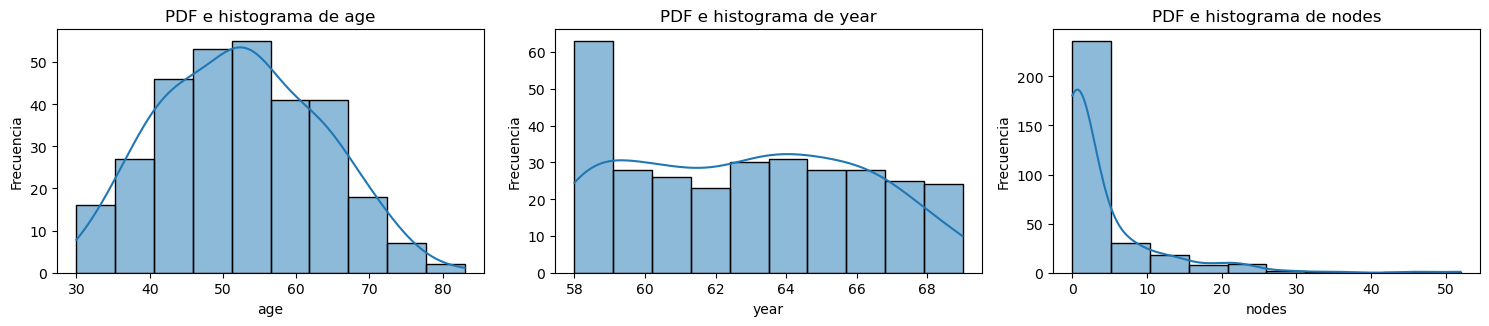

## Curtosis y sesgo

age: Kurtosis=-0.5894, Skewness=0.1465

year: Kurtosis=-1.1188, Skewness=0.0788

nodes: Kurtosis=11.7309, Skewness=2.9838

In [7]:
plt.figure(figsize=(15, 15))

kws_display = ["## Curtosis y sesgo"]

for col in numeric_columns:
    plt.subplot(5, 3, np.where(numeric_columns == col)[0][0] + 1)
    sns.histplot(df[col], kde=True, bins=BINS)
    plt.title(f"PDF e histograma de {col}", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.xlabel(col, fontsize=10)
    kws_display.append(f"{col}: Kurtosis={df[col].kurtosis():.4f}, Skewness={df[col].skew():.4f}")
    
plt.tight_layout()
plt.show()

for elm in kws_display:
    display(Markdown(elm))



- Gráficas de barras para la columna categórica status (supervivencia).

In [8]:
df["status"].value_counts()

status
survived 5 years or longer    225
died within 5 year             81
Name: count, dtype: int64

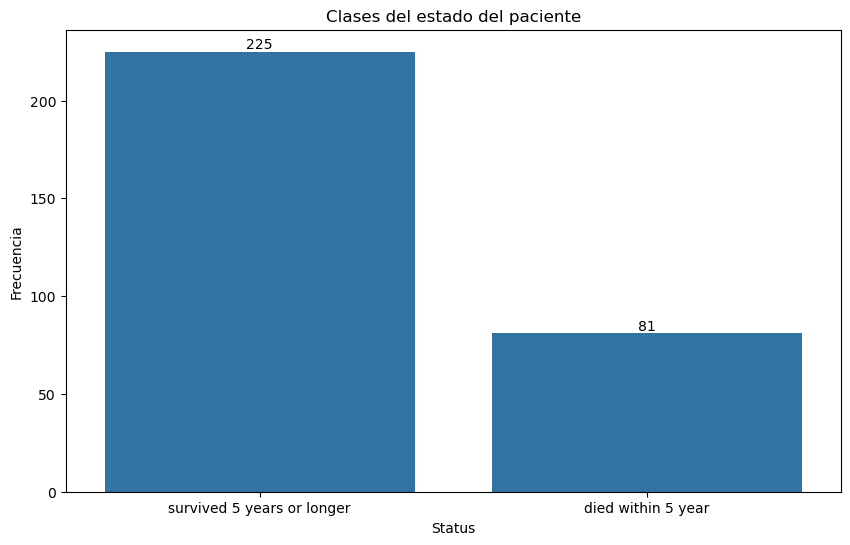

In [9]:
plt.figure(figsize=(10, 6))

gx = sns.barplot(df["status"].value_counts(), estimator="sum", errorbar=None)
plt.bar_label(gx.containers[0], fontsize=10)
plt.title("Clases del estado del paciente")
plt.xlabel("Status")
plt.ylabel("Frecuencia")

plt.show()


- Boxplots para identificar outliers en las columnas numéricas.

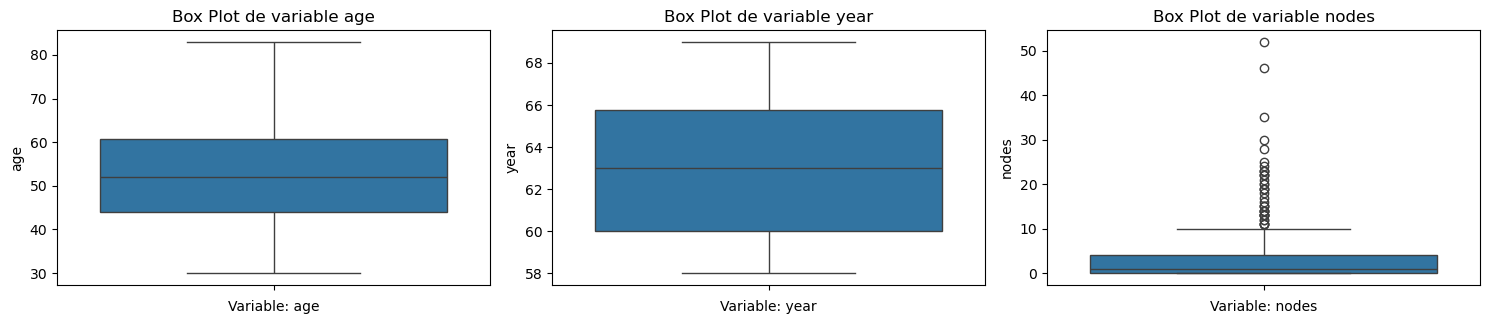

In [10]:
plt.figure(figsize=(15, 15))

for col in numeric_columns:
    plt.subplot(5, 3, np.where(numeric_columns == col)[0][0] + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f"Box Plot de variable {col}", fontsize=12)
    plt.xlabel(f"Variable: {col}", fontsize=10)
    plt.ylabel(col, fontsize=10)
    
plt.tight_layout()
plt.show()


- Matriz de correlación y mapa de calor.

In [11]:
# Creamos la matriz de correlación primero
matrix_corr = df[numeric_columns].corr(method="spearman")

matrix_corr

,age,year,nodes
age,1.000000,0.091069,-0.097691
year,0.091069,1.000000,-0.036146
nodes,-0.097691,-0.036146,1.000000


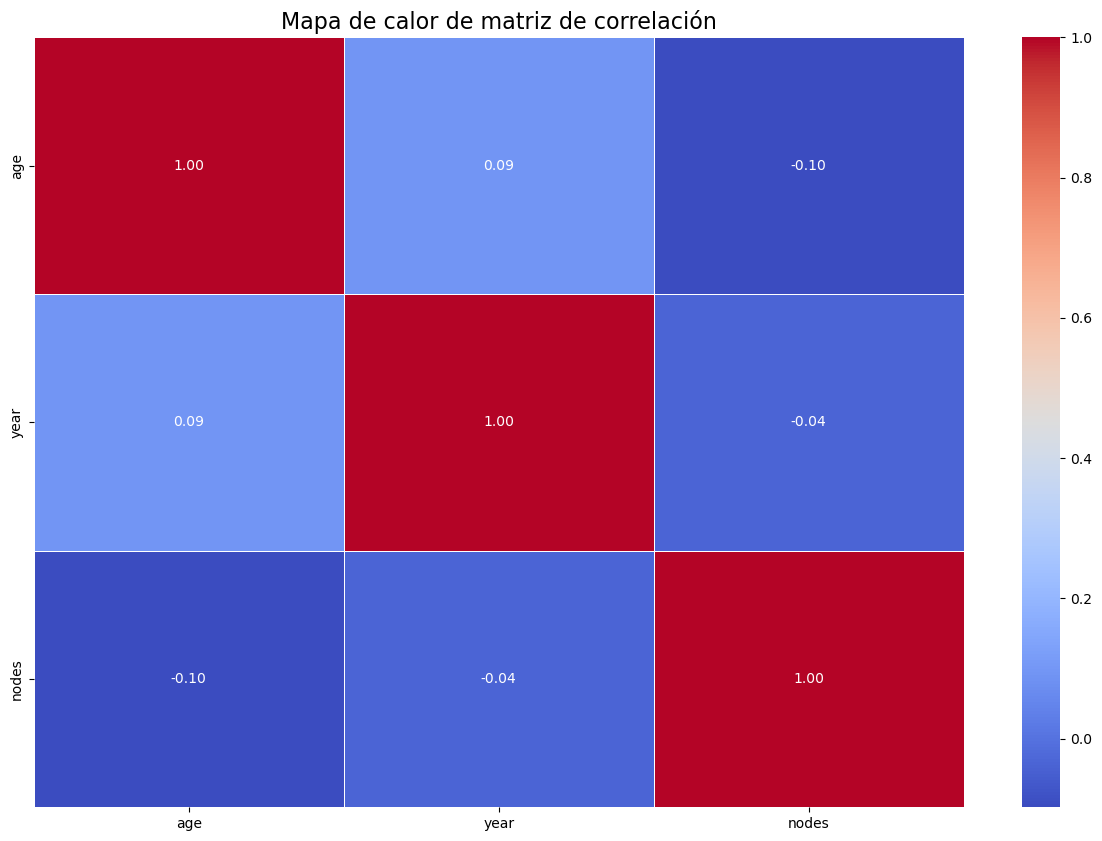

In [12]:
# Ahora el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de matriz de correlación", fontsize=16)

plt.show()


- Pairplot para visualizar relaciones entre variables numéricas.

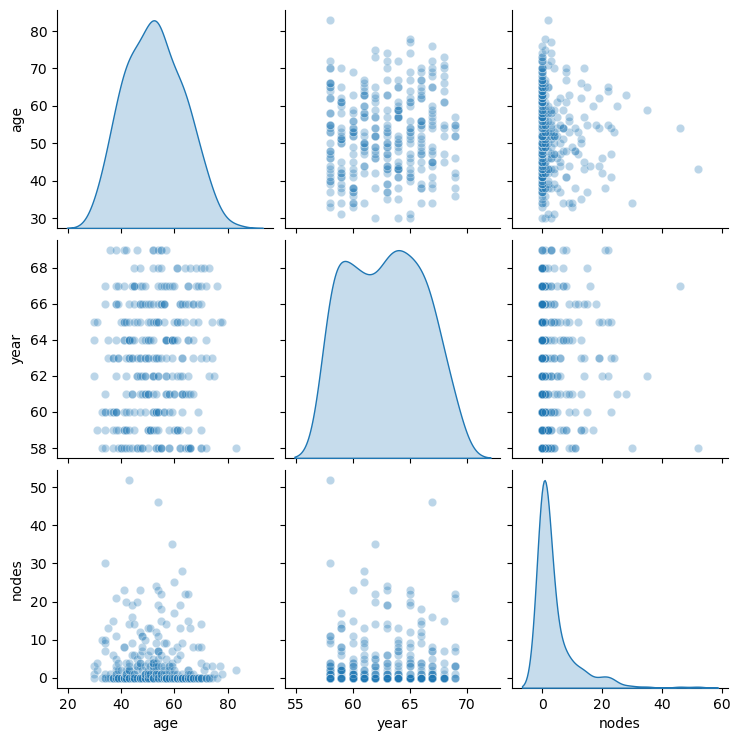

In [13]:
sns.pairplot(df[numeric_columns], plot_kws={"alpha": 0.3}, diag_kind="kde")

plt.show()


- Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

## Pruebas de normalidad

### Variable age

-------------------------------------------------------------------------------------------------------


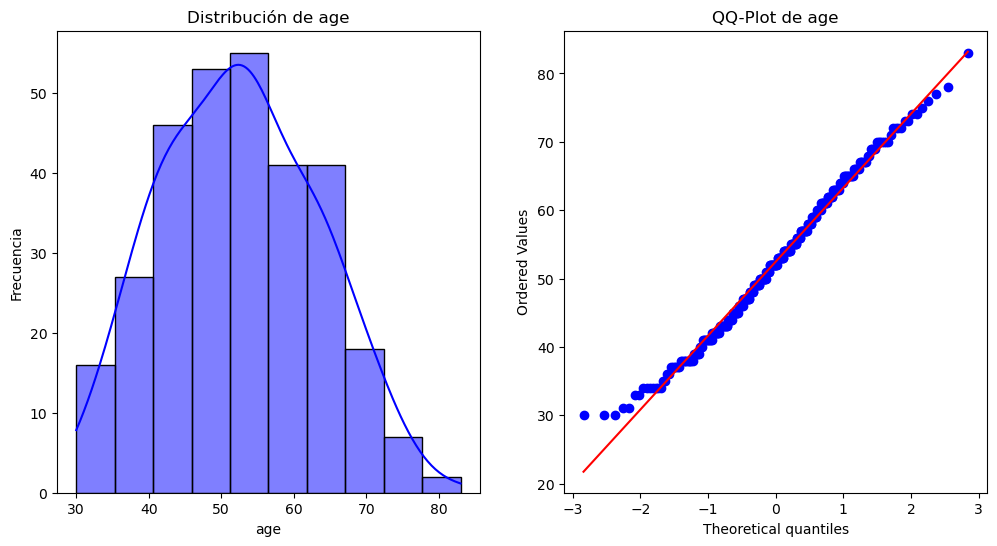

Prueba de Normalidad para: age
	Prueba de Shapiro-Wilk (p<=0.05): p-value: 0.02605, valor: 0.98946, evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
	Prueba de Anderson-Darling: valor: 0.73156
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
			Al nivel de significancia aplha de 15.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 10.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 5.0%, los datos parecen normales.
			Al nivel de significancia aplha de 2.5%, los datos parecen normales.
			Al nivel de significancia aplha de 1.0%, los datos parecen normales.
	Prueba de Kolmogorov-Smirnov (p<=0.05): p-value: 0.00000, valor: 1.00000, evaluación: , evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
__________________________

### Variable year

-------------------------------------------------------------------------------------------------------


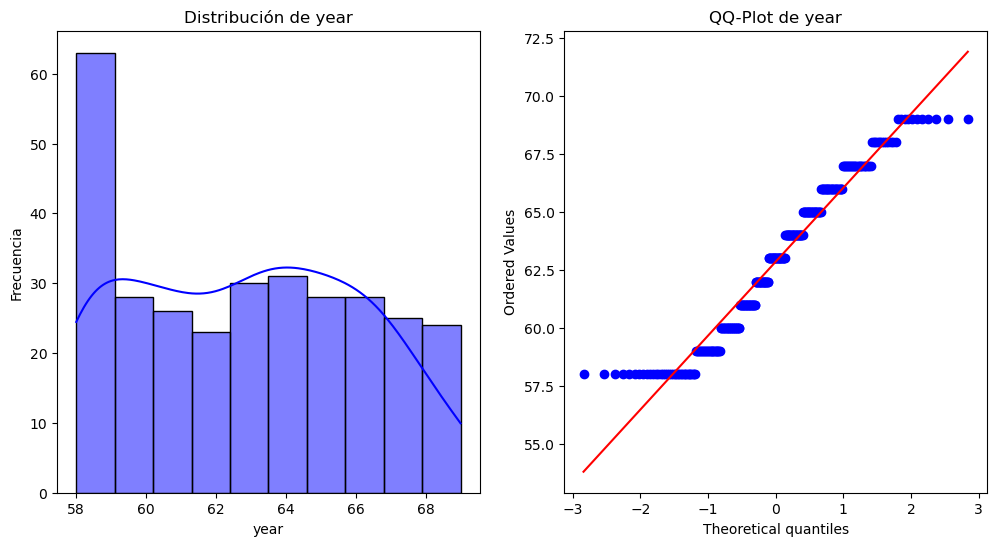

Prueba de Normalidad para: year
	Prueba de Shapiro-Wilk (p<=0.05): p-value: 0.00000, valor: 0.94679, evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
	Prueba de Anderson-Darling: valor: 4.31374
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
			Al nivel de significancia aplha de 15.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 10.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 5.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 2.5%, los datos NO parecen normales.
			Al nivel de significancia aplha de 1.0%, los datos NO parecen normales.
	Prueba de Kolmogorov-Smirnov (p<=0.05): p-value: 0.00000, valor: 1.00000, evaluación: , evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
________________

### Variable nodes

-------------------------------------------------------------------------------------------------------


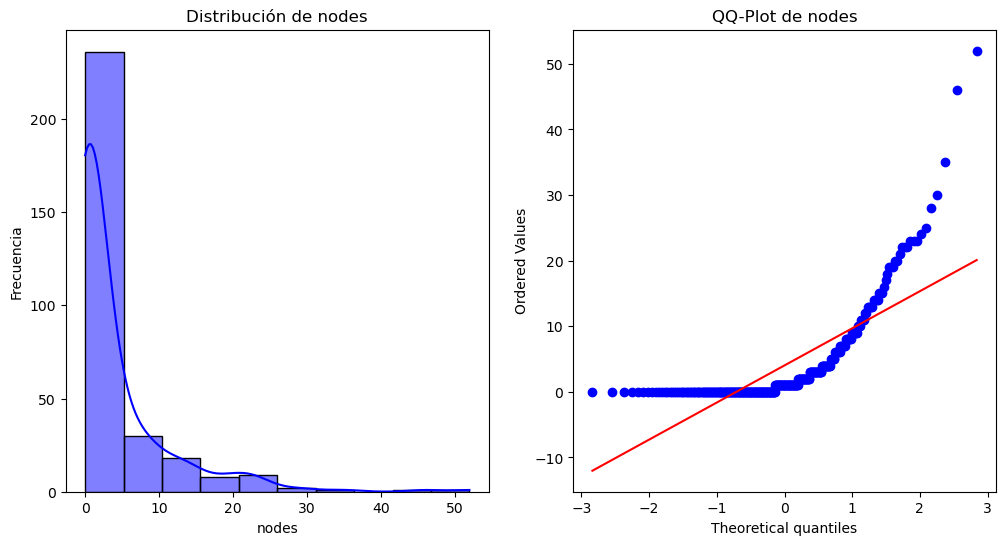

Prueba de Normalidad para: nodes
	Prueba de Shapiro-Wilk (p<=0.05): p-value: 0.00000, valor: 0.61531, evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
	Prueba de Anderson-Darling: valor: 39.68662
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
			Al nivel de significancia aplha de 15.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 10.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 5.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 2.5%, los datos NO parecen normales.
			Al nivel de significancia aplha de 1.0%, los datos NO parecen normales.
	Prueba de Kolmogorov-Smirnov (p<=0.05): p-value: 0.00000, valor: 0.50000, evaluación: , evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
______________

In [14]:
SE_RECHAZA_H0 = "Se rechaza la H0"
NO_SE_RECHAZA_H0 = "No se rechaza la H0"

display(Markdown("## Pruebas de normalidad"))
for column in numeric_columns:
    display(Markdown(f"### Variable {column}"))
    print("-------------------------------------------------------------------------------------------------------")
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True, color="blue", bins=BINS)
    plt.title(f'Distribución de {column}', fontsize=12)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.xlabel(column, fontsize=10)
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ-Plot de {column}', fontsize=12)
    
    plt.show()
    
    print(f"Prueba de Normalidad para: {column}")
    
    stest = stats.shapiro(df[column].dropna().sample(min(5000, len(df[column])), random_state=random_state)) # se limita a 5000 por warning de librería
    print(f"\tPrueba de Shapiro-Wilk (p<=0.05): p-value: {stest.pvalue:.5f}, valor: {stest.statistic:.5f}, evaluación: {SE_RECHAZA_H0 if stest.pvalue <= 0.05 else NO_SE_RECHAZA_H0}") 
    print("\t\tH0: La muestra viene de una distribución normal.")
    print("\t\tHa: La muestra no viene de una distribución normal.")
    
    atest = stats.anderson(df[column].dropna(), dist='norm')
    print(f"\tPrueba de Anderson-Darling: valor: {atest.statistic:.5f}")
    print("\t\tH0: La muestra viene de una distribución normal.")
    print("\t\tHa: La muestra no viene de una distribución normal.")
    
    for i in range(len(atest.critical_values)):
        sl, cv = atest.significance_level[i], atest.critical_values[i]
        if atest.statistic < cv:
            print(f"\t\t\tAl nivel de significancia aplha de {sl}%, los datos parecen normales.")
        else:
            print(f"\t\t\tAl nivel de significancia aplha de {sl}%, los datos NO parecen normales.")
    
    ktest = stats.kstest(df[column].dropna(), 'norm')
    print(f"\tPrueba de Kolmogorov-Smirnov (p<=0.05): p-value: {ktest.pvalue:.5f}, valor: {ktest.statistic:.5f}, evaluación: , evaluación: {SE_RECHAZA_H0 if ktest.pvalue <= 0.05 else NO_SE_RECHAZA_H0}")
    print("\t\tH0: La muestra viene de una distribución normal.")
    print("\t\tHa: La muestra no viene de una distribución normal.")
    
    print("_______________________________________________________________________________________________________")

3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.

In [15]:
# Removemos los duplpicados ya que encontramos algunos previamente
df = df[~df.duplicated()] 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     289 non-null    int64   
 1   year    289 non-null    int64   
 2   nodes   289 non-null    int64   
 3   status  289 non-null    category
dtypes: category(1), int64(3)
memory usage: 9.4 KB


In [16]:
df.head(25)

,age,year,nodes,status
0,30,64,1,survived 5 years or longer
1,30,62,3,survived 5 years or longer
2,30,65,0,survived 5 years or longer
3,31,59,2,survived 5 years or longer
4,31,65,4,survived 5 years or longer
5,33,58,10,survived 5 years or longer
6,33,60,0,survived 5 years or longer
7,34,59,0,died within 5 year
8,34,66,9,died within 5 year
9,34,58,30,survived 5 years or longer


In [17]:
# Buscamos valores perdidos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     289 non-null    int64   
 1   year    289 non-null    int64   
 2   nodes   289 non-null    int64   
 3   status  289 non-null    category
dtypes: category(1), int64(3)
memory usage: 9.4 KB


No hay nulos, solo hubo repetidos.

# 4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados.

2a. Realizar un EDA completo, incluyendo:

- Descripción de los datos.

In [18]:
df[numeric_columns].describe()

,age,year,nodes
count,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453
std,10.876915,3.275794,7.325239
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.000000,66.000000,5.000000
max,83.000000,69.000000,52.000000


- Histogramas para las columnas numéricas.

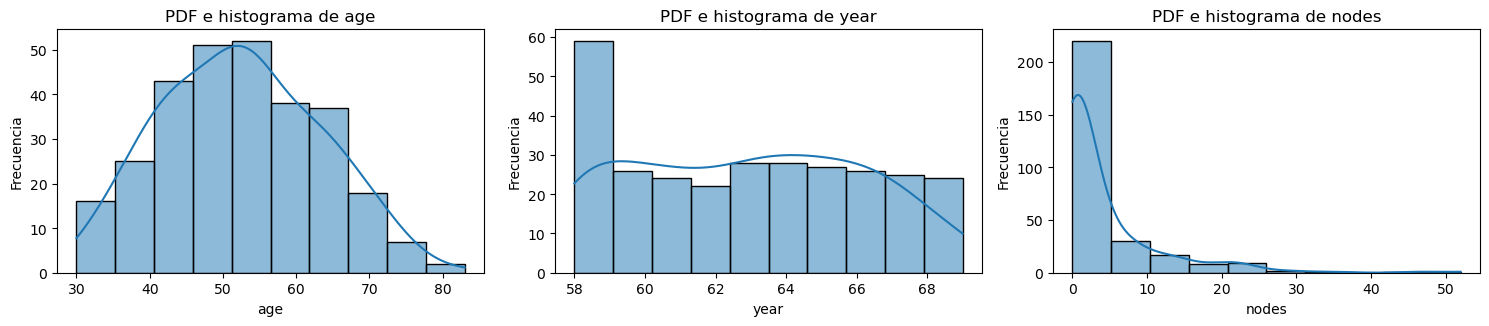

## Curtosis y sesgo

age: Kurtosis=-0.5702, Skewness=0.1654

year: Kurtosis=-1.1353, Skewness=0.0644

nodes: Kurtosis=11.1643, Skewness=2.9142

In [19]:

plt.figure(figsize=(15, 15))

kws_display = ["## Curtosis y sesgo"]

for col in numeric_columns:
    plt.subplot(5, 3, np.where(numeric_columns == col)[0][0] + 1)
    sns.histplot(df[col], kde=True, bins=BINS)
    plt.title(f"PDF e histograma de {col}", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.xlabel(col, fontsize=10)
    kws_display.append(f"{col}: Kurtosis={df[col].kurtosis():.4f}, Skewness={df[col].skew():.4f}")
    
plt.tight_layout()
plt.show()

for elm in kws_display:
    display(Markdown(elm))

- Gráficas de barras para la columna categórica status (supervivencia).

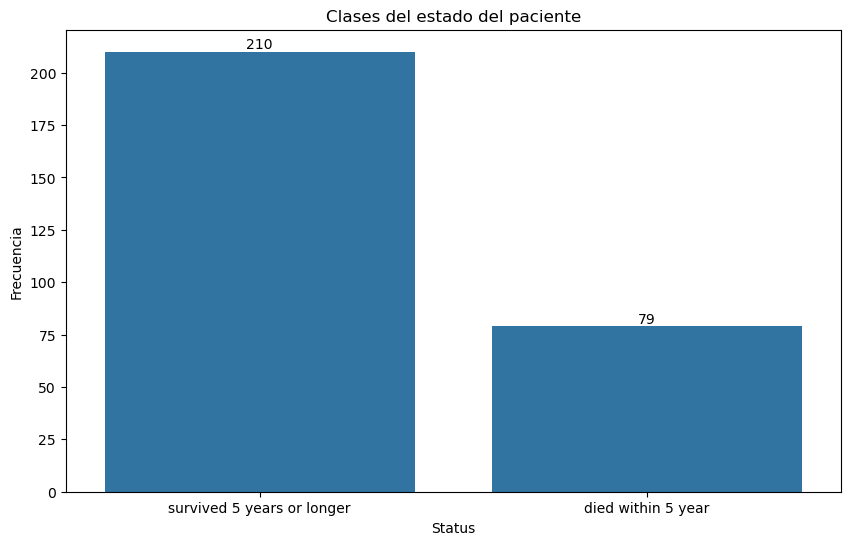

In [20]:
plt.figure(figsize=(10, 6))

gx = sns.barplot(df["status"].value_counts(), estimator="sum", errorbar=None)
plt.bar_label(gx.containers[0], fontsize=10)
plt.title("Clases del estado del paciente")
plt.xlabel("Status")
plt.ylabel("Frecuencia")

plt.show()

- Boxplots para identificar outliers en las columnas numéricas.

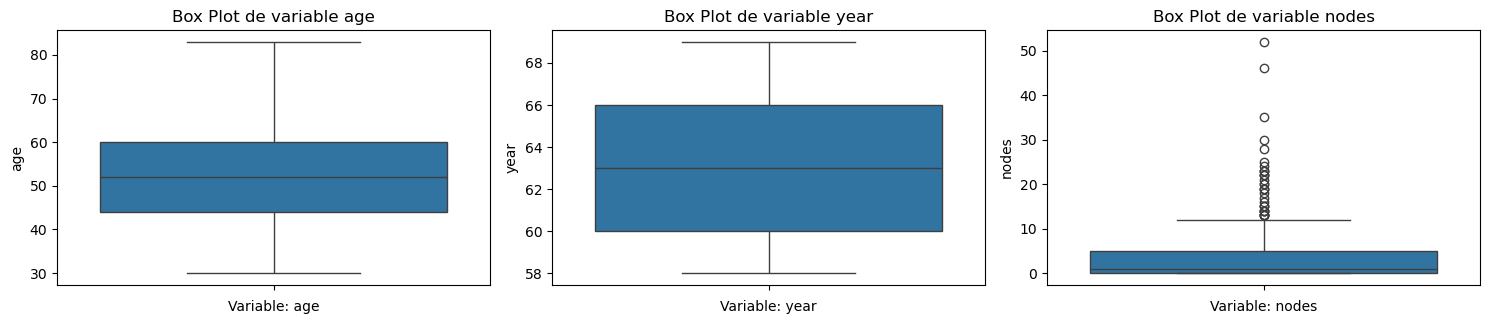

In [21]:
plt.figure(figsize=(15, 15))

for col in numeric_columns:
    plt.subplot(5, 3, np.where(numeric_columns == col)[0][0] + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f"Box Plot de variable {col}", fontsize=12)
    plt.xlabel(f"Variable: {col}", fontsize=10)
    plt.ylabel(col, fontsize=10)
    
plt.tight_layout()
plt.show()

- Matriz de correlación y mapa de calor.

In [22]:
matrix_corr = df[numeric_columns].corr(method="spearman")

matrix_corr

,age,year,nodes
age,1.000000,0.091068,-0.092673
year,0.091068,1.000000,-0.034758
nodes,-0.092673,-0.034758,1.000000


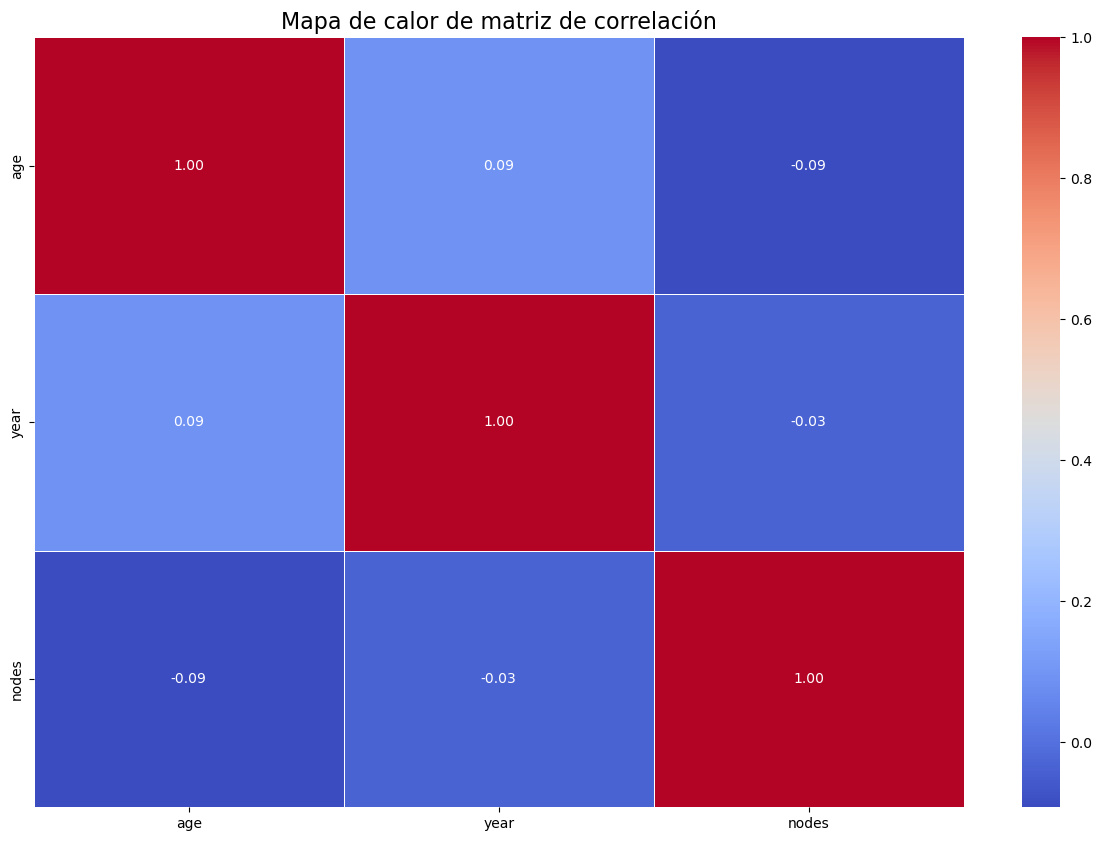

In [23]:
# Ahora el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de matriz de correlación", fontsize=16)

plt.show()

- Pairplot para visualizar relaciones entre variables numéricas.

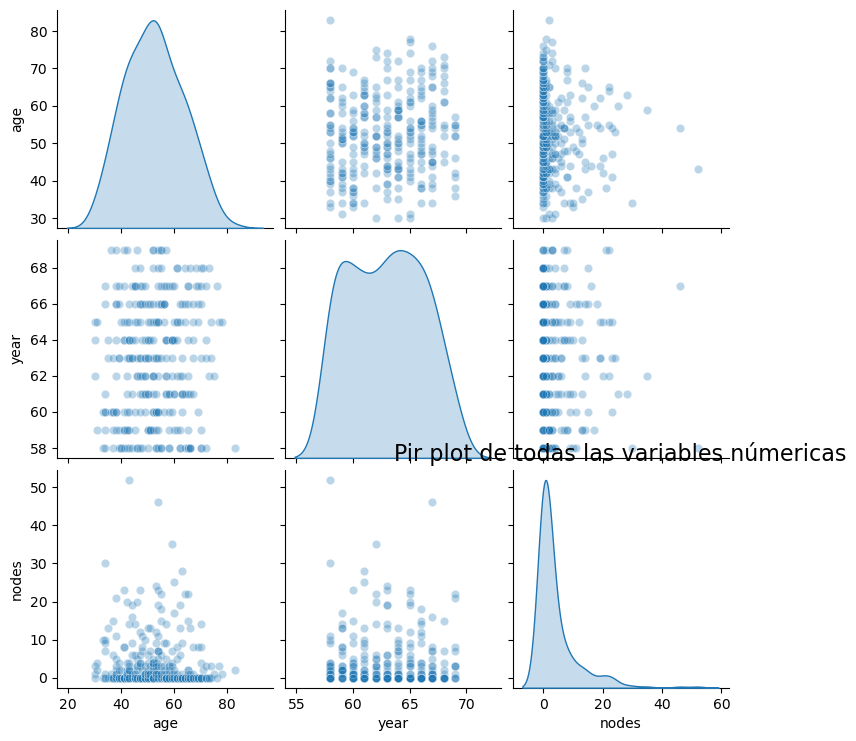

In [24]:
sns.pairplot(df[numeric_columns], plot_kws={"alpha": 0.3}, diag_kind="kde")
plt.title("Pir plot de todas las variables númericas", fontsize=16)

plt.show()

- Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

## Pruebas de normalidad

### Variable age

-------------------------------------------------------------------------------------------------------


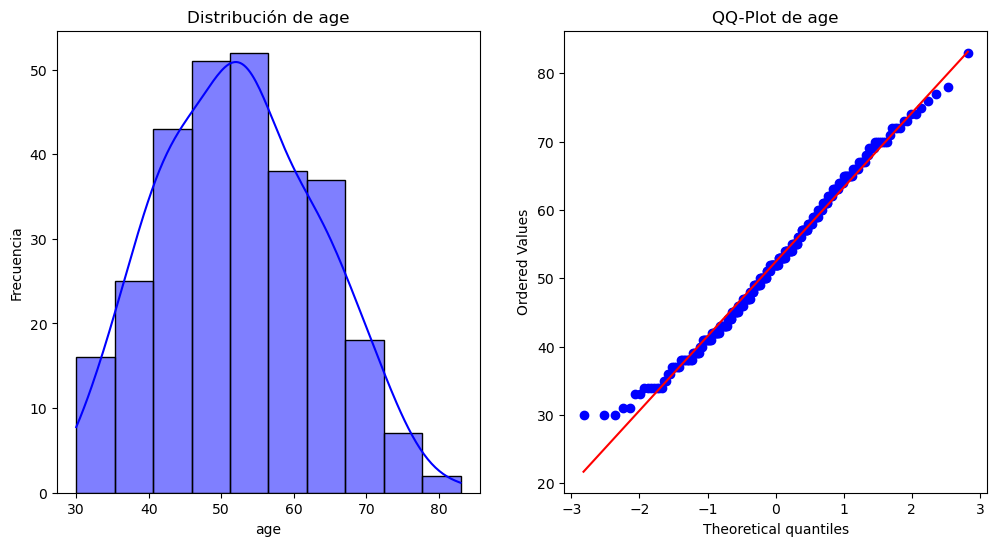

Prueba de Normalidad para: age
	Prueba de Shapiro-Wilk (p<0.05): p-value: 0.03203, valor: 0.98931, evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
	Prueba de Anderson-Darling: valor: 0.68222
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
			Al nivel de significancia aplha de 15.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 10.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 5.0%, los datos parecen normales.
			Al nivel de significancia aplha de 2.5%, los datos parecen normales.
			Al nivel de significancia aplha de 1.0%, los datos parecen normales.
	Prueba de Kolmogorov-Smirnov (p<0.05): p-value: 0.00000, valor: 1.00000, evaluación: , evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
____________________________

### Variable year

-------------------------------------------------------------------------------------------------------


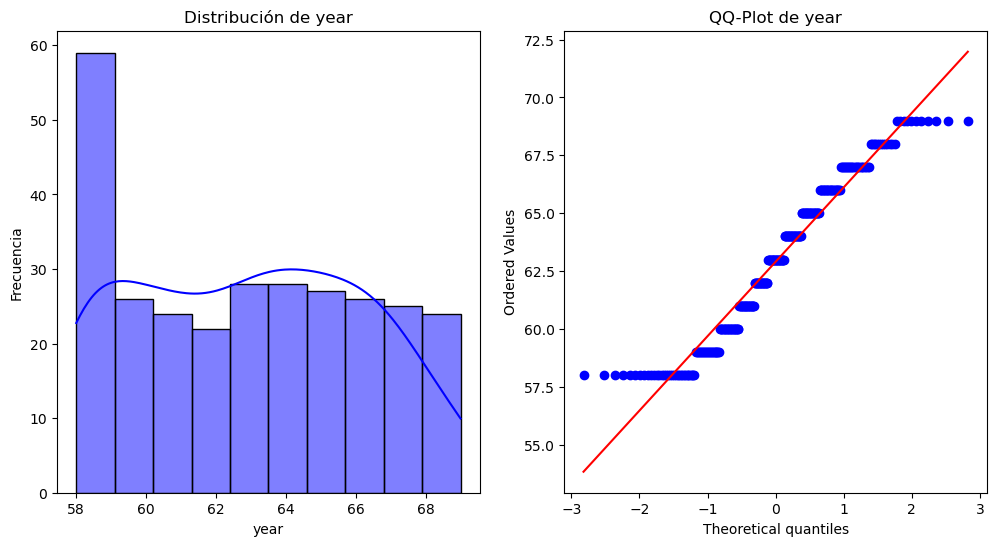

Prueba de Normalidad para: year
	Prueba de Shapiro-Wilk (p<0.05): p-value: 0.00000, valor: 0.94593, evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
	Prueba de Anderson-Darling: valor: 4.12975
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
			Al nivel de significancia aplha de 15.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 10.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 5.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 2.5%, los datos NO parecen normales.
			Al nivel de significancia aplha de 1.0%, los datos NO parecen normales.
	Prueba de Kolmogorov-Smirnov (p<0.05): p-value: 0.00000, valor: 1.00000, evaluación: , evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
__________________

### Variable nodes

-------------------------------------------------------------------------------------------------------


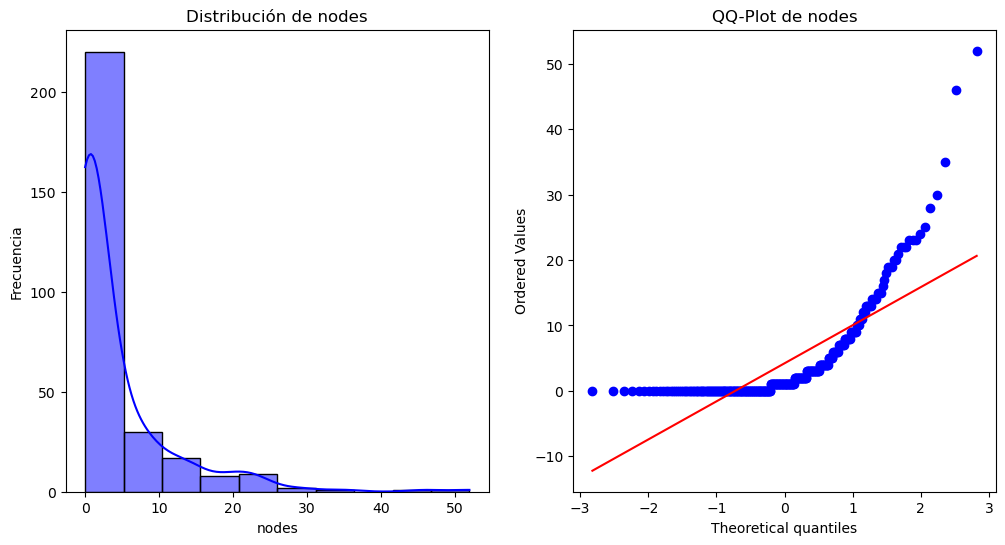

Prueba de Normalidad para: nodes
	Prueba de Shapiro-Wilk (p<0.05): p-value: 0.00000, valor: 0.62742, evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
	Prueba de Anderson-Darling: valor: 35.87851
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
			Al nivel de significancia aplha de 15.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 10.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 5.0%, los datos NO parecen normales.
			Al nivel de significancia aplha de 2.5%, los datos NO parecen normales.
			Al nivel de significancia aplha de 1.0%, los datos NO parecen normales.
	Prueba de Kolmogorov-Smirnov (p<0.05): p-value: 0.00000, valor: 0.50000, evaluación: , evaluación: Se rechaza la H0
		H0: La muestra viene de una distribución normal.
		Ha: La muestra no viene de una distribución normal.
________________

In [25]:
display(Markdown(f"## Pruebas de normalidad"))
for column in numeric_columns:
    display(Markdown(f"### Variable {column}"))
    print("-------------------------------------------------------------------------------------------------------")
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color="blue", bins=BINS)
    plt.title(f'Distribución de {column}', fontsize=12)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.xlabel(column, fontsize=10)
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ-Plot de {column}', fontsize=12)
    
    plt.show()
    
    print(f"Prueba de Normalidad para: {column}")
    
    stest = stats.shapiro(df[column].sample(min(5000, len(df[column])), random_state=random_state)) # se limita a 5000 por warning de librería
    print(f"\tPrueba de Shapiro-Wilk (p<0.05): p-value: {stest.pvalue:.5f}, valor: {stest.statistic:.5f}, evaluación: {SE_RECHAZA_H0 if stest.pvalue <= 0.05 else NO_SE_RECHAZA_H0}") 
    print("\t\tH0: La muestra viene de una distribución normal.")
    print("\t\tHa: La muestra no viene de una distribución normal.")
    
    atest = stats.anderson(df[column], dist='norm')
    print(f"\tPrueba de Anderson-Darling: valor: {atest.statistic:.5f}")
    print("\t\tH0: La muestra viene de una distribución normal.")
    print("\t\tHa: La muestra no viene de una distribución normal.")
    
    for i in range(len(atest.critical_values)):
        sl, cv = atest.significance_level[i], atest.critical_values[i]
        if atest.statistic < cv:
            print(f"\t\t\tAl nivel de significancia aplha de {sl}%, los datos parecen normales.")
        else:
            print(f"\t\t\tAl nivel de significancia aplha de {sl}%, los datos NO parecen normales.")
    
    ktest = stats.kstest(df[column], 'norm')
    print(f"\tPrueba de Kolmogorov-Smirnov (p<0.05): p-value: {ktest.pvalue:.5f}, valor: {ktest.statistic:.5f}, evaluación: , evaluación: {SE_RECHAZA_H0 if ktest.pvalue <= 0.05 else NO_SE_RECHAZA_H0}")
    print("\t\tH0: La muestra viene de una distribución normal.")
    print("\t\tHa: La muestra no viene de una distribución normal.")
    
    print("_______________________________________________________________________________________________________")